In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import trapz,tplquad

In [2]:
# physical parameters

# Bohr radius
a0 = 0.529 # Å

# Vaccume permitivity
e_0 = 8.854e-42 # kg^-1 * Å^-3 * s^4 * A^2

# Elementary charge
e = 1.60217663e-19 # A * s 

# Carbon's mass ratio
Z = 12.01

# Lattice Spacing of the Graphene
d = 1.42 # Å

# Lattice constant of the Bravais
a = np.sqrt(3)*d

# 1[eV] = 1.6*10^(-19) [J]
# 1[J] = 1/1.6*10^(19)[eV]
# 1[J] = kg * m^2 * s^(-2) = 10^20 * kg * s^(-2) * Å^2

# So 1 [kg * s^(-2) * Å^2] = 1/16 [eV]

In [3]:
# s-orbital
def s_orbit_r(r, a0 = a0, Z = Z):
    psi = 1/np.sqrt(np.pi) * (Z/(2*a0))**(3/2) * (1 - Z*r/(2*a0)) * np.exp(-Z*r/(2*a0))
    return psi

# pz-orbital
def pz_orbit_r(r, a0 = a0, Z = Z):
    psi = 1/(2*np.sqrt(np.pi)) * (Z/(2*a0))**(3/2) * (Z*r/a0) * np.exp(-Z*r/(2*a0))
    return psi

def pz_orbit_theta(theta):
    return np.cos(theta)

# px-orbital
def px_orbit_r(r, a0 = a0, Z = Z):
    psi = - 1/(2*np.sqrt(np.pi)) * (Z/(2*a0))**(3/2) * (Z*r/a0) * np.exp(-Z*r/(2*a0))
    return psi

def px_orbit_theta(theta):
    return np.sin(theta) 

def px_orbit_phi(phi):
    return np.cos(phi)

# py-orbital
def py_orbit_r(r, a0 = a0, Z = Z):
    psi = - 1/(2*np.sqrt(np.pi)) * (Z/(2*a0))**(3/2) * (Z*r/a0) * np.exp(-Z*r/(2*a0))
    return psi

def py_orbit_theta(theta):
    return np.sin(theta) 

def py_orbit_phi(phi):
    return np.sin(phi)

In [4]:
r = np.linspace(1e-20,5*a0,100000)
theta = np.linspace(0,np.pi,100000)
phi = np.linspace(0,2*np.pi,100000)

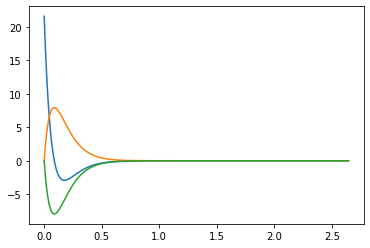

In [5]:
plt.plot(r, s_orbit_r(r))
plt.plot(r, pz_orbit_r(r)*pz_orbit_theta(0))
plt.plot(r, pz_orbit_r(r)*pz_orbit_theta(np.pi))

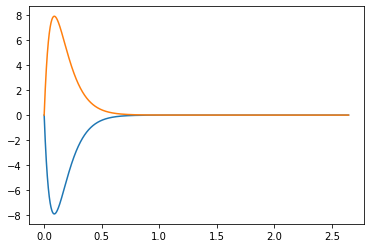

In [6]:
plt.plot(r, px_orbit_r(r)* px_orbit_theta(np.pi/2) *px_orbit_phi(0))
plt.plot(r, px_orbit_r(r)* px_orbit_theta(np.pi/2) *px_orbit_phi(np.pi))

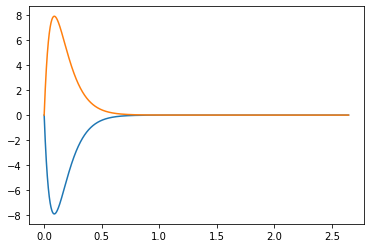

In [7]:
plt.plot(r, py_orbit_r(r)* py_orbit_theta(np.pi/2) *py_orbit_phi(np.pi/2))
plt.plot(r, py_orbit_r(r)* py_orbit_theta(np.pi/2) *py_orbit_phi(3*np.pi/2))

In [8]:
# Check Normalization
# Don't forget Jacobian!

# s-orbital
func_s = s_orbit_r(r)**2*r**2*4*np.pi
normal_s = trapz(func_s[0 : len(r)], r[0 : len(r)])

# pz-orbital
func_pz_r = pz_orbit_r(r)**2*r**2
normal_pz_r = trapz(func_pz_r[0 : len(r)], r[0 : len(r)])

func_pz_theta = pz_orbit_theta(theta)**2*np.sin(theta)*2*np.pi
normal_pz_theta = trapz(func_pz_theta[0 : len(theta)], theta[0 : len(theta)])

normal_pz = normal_pz_r * normal_pz_theta

# px-orbital
func_px_r = px_orbit_r(r)**2*r**2
normal_px_r = trapz(func_px_r[0 : len(r)], r[0 : len(r)])

func_px_theta = px_orbit_theta(theta)**2*np.sin(theta)
normal_px_theta = trapz(func_px_theta[0 : len(theta)], theta[0 : len(theta)])

func_px_phi = px_orbit_phi(phi)**2
normal_px_phi = trapz(func_px_phi[0 : len(phi)], phi[0 : len(phi)])

normal_px = normal_px_r * normal_px_theta * normal_px_phi

# py-orbital
func_py_r = py_orbit_r(r)**2*r**2
normal_py_r = trapz(func_py_r[0 : len(r)], r[0 : len(r)])

func_py_theta = py_orbit_theta(theta)**2*np.sin(theta)
normal_py_theta = trapz(func_py_theta[0 : len(theta)], theta[0 : len(theta)])

func_py_phi = py_orbit_phi(phi)**2
normal_py_phi = trapz(func_py_phi[0 : len(phi)], phi[0 : len(phi)])

normal_py = normal_py_r * normal_py_theta * normal_py_phi


print(normal_s, normal_pz, normal_px, normal_py) # ok

0.9999999999999987 0.9999999997532546 0.9999999999999997 0.9999999999999998


In [9]:
# s-orbital
def s_orbit(x, y, z, a0 = a0, Z = Z):
    r = np.sqrt(x**2 + y**2 + z**2)
    psi = 1/np.sqrt(np.pi) * (Z/(2*a0))**(3/2) * (1 - Z*r/(2*a0)) * np.exp(-Z*r/(2*a0))
    return psi

# pz-orbital
def pz_orbit(x, y, z, a0 = a0, Z = Z):
    r = np.sqrt(x**2 + y**2 + z**2+1e-20)
    cos_theta = z/(r+1e-20)
    psi = 1/(2*np.sqrt(np.pi)) * (Z/(2*a0))**(3/2) * (Z*r/a0) * np.exp(-Z*r/(2*a0)) * cos_theta
    return psi
    
# px-orbital
def px_orbit(x, y, z, a0 = a0, Z = Z):
    r = np.sqrt(x**2 + y**2 + z**2+1e-20)
    R = np.sqrt(x**2 + y**2+1e-40)
    sin_theta = R/(r+1e-20)
    cos_phi = x/(r*sin_theta)
    psi = - 1/(2*np.sqrt(np.pi)) * (Z/(2*a0))**(3/2) * (Z*r/a0) * np.exp(-Z*r/(2*a0)) * sin_theta * cos_phi
    return psi

# py-orbital
def py_orbit(x, y, z, a0 = a0, Z = Z):
    r = np.sqrt(x**2 + y**2 + z**2 + 1e-20)
    R = np.sqrt(x**2 + y**2 + 1e-40)
    sin_theta = R/(r+1e-20)
    sin_phi = y/(r*sin_theta)
    psi = - 1/(2*np.sqrt(np.pi)) * (Z/(2*a0))**(3/2) * (Z*r/a0) * np.exp(-Z*r/(2*a0)) * sin_theta * sin_phi
    return psi

In [10]:
# Coulomb potential
def deltaU(x, y, z, Z = Z): # Spherically symmetric
    r = np.sqrt(x**2 + y**2 + z**2 + 1e-20)
    potential = - 1/(4*np.pi*e_0)*Z*e**2/np.abs(r)
    return potential

In [11]:
L = 2*a0
func = lambda x,y,z:s_orbit(x, y, z)**2
normal_s = tplquad(func, -L, L, -L, L, -L, L)
print("normalization of s-orbital = ",normal_s)

L = 2*a0
func = lambda x,y,z:pz_orbit(x, y, z)**2
normal_pz = tplquad(func, -L, L, -L, L, -L, L)
print("normalization of pz-orbital = ",normal_pz)
L = 2*a0
func = lambda x,y,z:px_orbit(x, y, z)**2
normal_px = tplquad(func, -L, L, -L, L, -L, L)
print("normalization of px-orbital = ",normal_px)

L = 2*a0
func = lambda x,y,z:py_orbit(x, y, z)**2
normal_py = tplquad(func, -L, L, -L, L, -L, L)
print("normalization of py-orbital = ",normal_py)

normalization of s-orbital =  (0.9999997895764741, 2.8990808451435617e-07)
normalization of pz-orbital =  (0.9999999177774126, 1.6731259058308753e-07)
normalization of px-orbital =  (0.9999999177692881, 2.9214908391178733e-07)
normalization of py-orbital =  (0.9999999177764304, 1.673125905812444e-07)


In [12]:
# Hybrid でやろう！！！！

In [13]:
# Calculate the hopping integrations.
L = 4*a0 + d
func = lambda x,y,z:s_orbit(x, y, z)* deltaU(x - d, y, z)* s_orbit(x - d, y, z)
sssigmaintegral = tplquad(func, -L, L, -L, L, -L, L)
sssigma = sssigmaintegral[0]/16
print("sssigma = ", sssigma, "[eV]")

sssigma =  -0.12173823924023817 [eV]


In [14]:
L = 10*a0 + d
func = lambda x,y,z:s_orbit(x, y, z)* deltaU(x - d, y, z)* s_orbit(x - d, y, z)
sssigmaintegral = tplquad(func, -L, L, -L, L, -L, L)
sssigma = sssigmaintegral[0]/16
print("sssigma = ", sssigma, "[eV]")

/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


sssigma =  -0.12173823924021744 [eV]
